<a href="https://colab.research.google.com/github/AbhirajSingh123/Time-Series-Forecasting-using-Python/blob/main/Time_Series_Forecasting_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pandas import Series
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv("Train_SU63ISt.csv")
test=pd.read_csv("Test_0qrQsBZ.csv")

In [3]:
train_original=train.copy()
test_original=test.copy()

# Train dataset

In [4]:
train.columns, test.columns

(Index(['ID', 'Datetime', 'Count'], dtype='object'),
 Index(['ID', 'Datetime'], dtype='object'))

In [5]:
train.dtypes, test.dtypes

(ID           int64
 Datetime    object
 Count        int64
 dtype: object,
 ID           int64
 Datetime    object
 dtype: object)

In [6]:
train.shape, test.shape

((18288, 3), (5112, 2))

**Feature Extraction**

In [7]:
train['Datetime']=pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M')
test['Datetime']=pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M')
test_original['Datetime']=pd.to_datetime(test_original.Datetime,format='%d-%m-%Y %H:%M')
train_original['Datetime']=pd.to_datetime(train_original.Datetime,format='%d-%m-%Y %H:%M')

In [8]:
for i in (train, test, test_original, train_original):
  i['year']=i.Datetime.dt.year
  i['month']=i.Datetime.dt.month
  i['day']=i.Datetime.dt.day
  i['hour']=i.Datetime.dt.hour

In [9]:
train['day of week']=train['Datetime'].dt.dayofweek
temp = train['Datetime']

In [10]:
def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
      return 1
    else:
        return 0
        temp2 = train['Datetime'].apply(applyer)
        train['weekend']=temp2

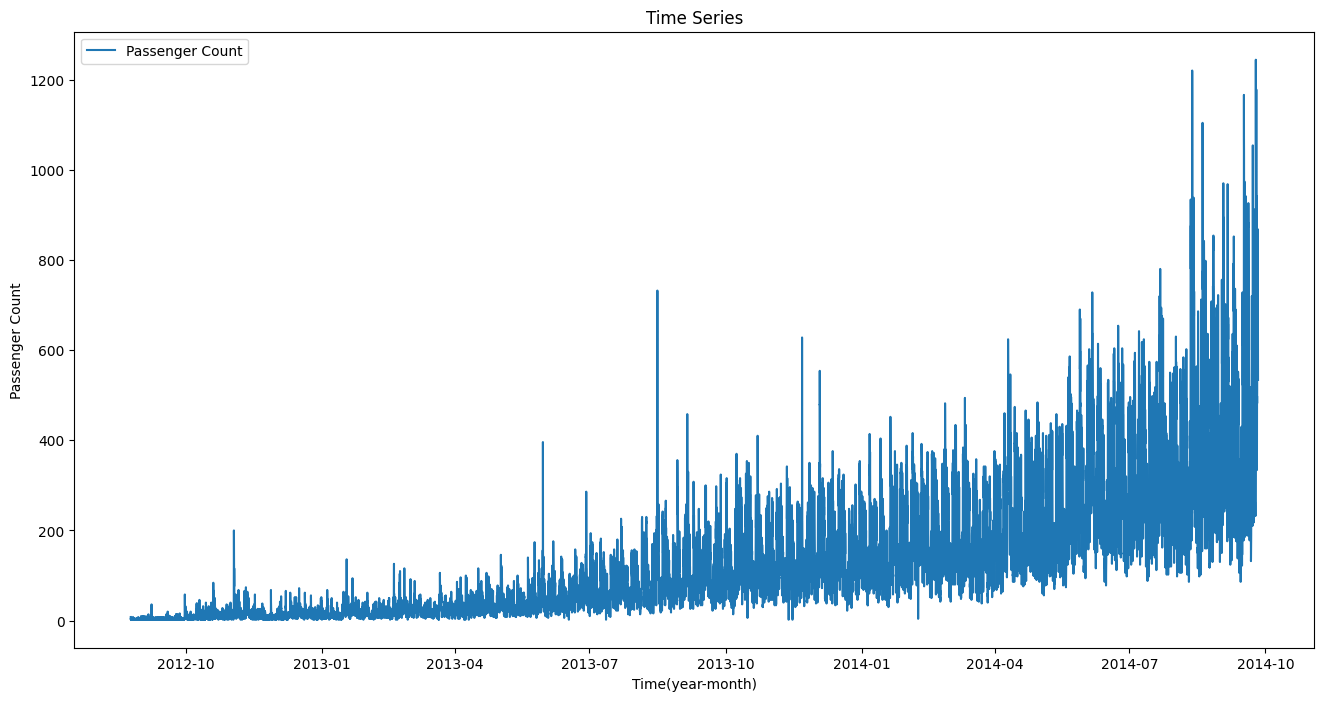

In [11]:
train.index = train['Datetime']
df=train.drop('ID',axis=1)
ts = df['Count']
plt.figure(figsize=(16,8))
plt.plot(ts, label='Passenger Count')
plt.title('Time Series')
plt.xlabel("Time(year-month)")
plt.ylabel("Passenger Count")
plt.legend(loc='best')

# Exploratory Analysis

<Axes: xlabel='year'>

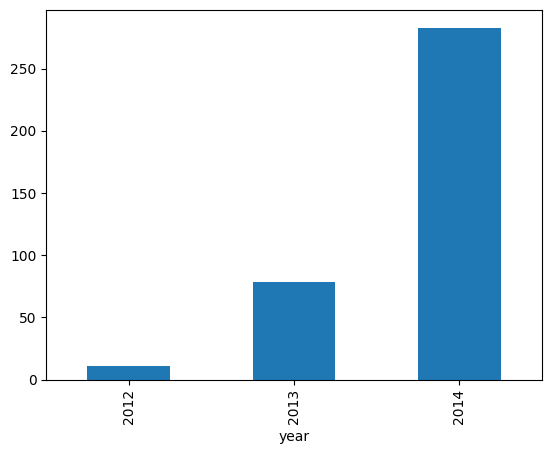

In [12]:
train.groupby('year')['Count'].mean().plot.bar()

<Axes: xlabel='month'>

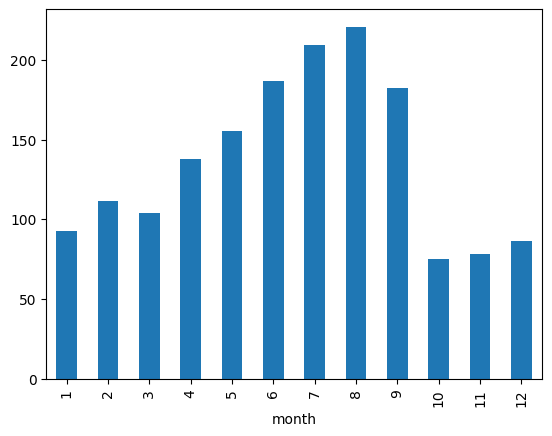

In [13]:
train.groupby('month')['Count'].mean().plot.bar()

<Axes: title={'center': 'passenger Count(Monthwise)'}, xlabel='year,month'>

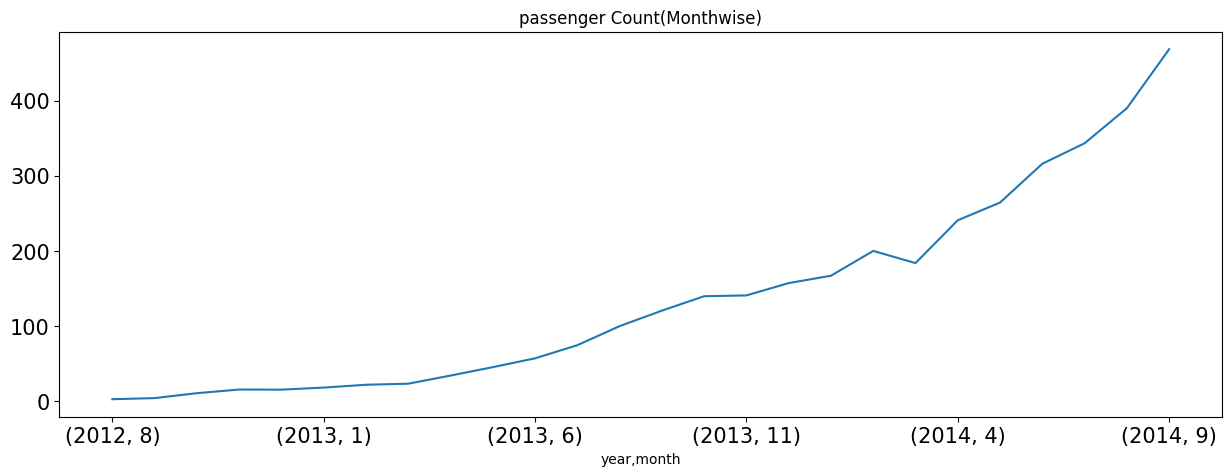

In [14]:
temp=train.groupby(['year','month'])['Count'].mean()
temp.plot(figsize=(15,5), title='passenger Count(Monthwise)', fontsize=15)

<Axes: xlabel='day'>

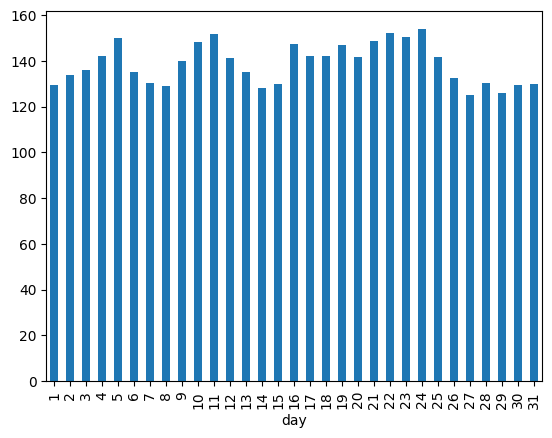

In [15]:
train.groupby('day')['Count'].mean().plot.bar()

<Axes: xlabel='hour'>

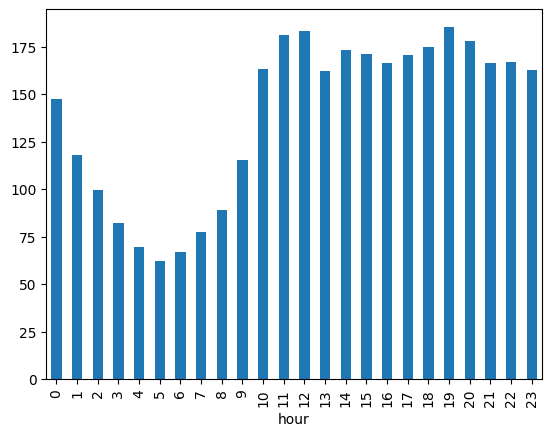

In [16]:
train.groupby('hour')['Count'].mean().plot.bar()

In [17]:
train.groupby('weekend')['Count'].mean().plot.bar()

KeyError: 'weekend'

<Axes: xlabel='day of week'>

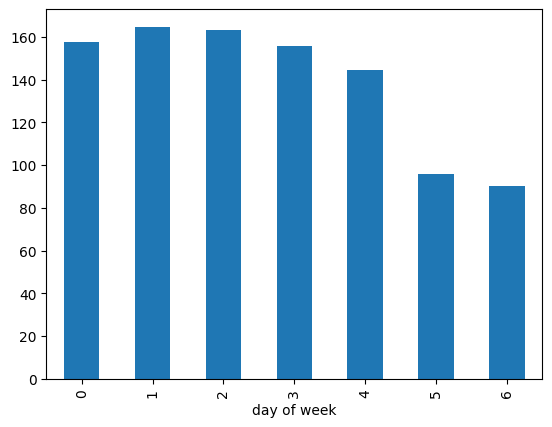

In [18]:
train.groupby('day of week')['Count'].mean().plot.bar()

In [19]:
train=train.drop('ID',axis=1)

In [20]:
train.Timestamp=pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M')
train.index = train.Timestamp
hourly = train.resample('H').mean()
daily = train.resample('D').mean()
weekly = train.resample('W').mean()
monthly = train.resample('M').mean()


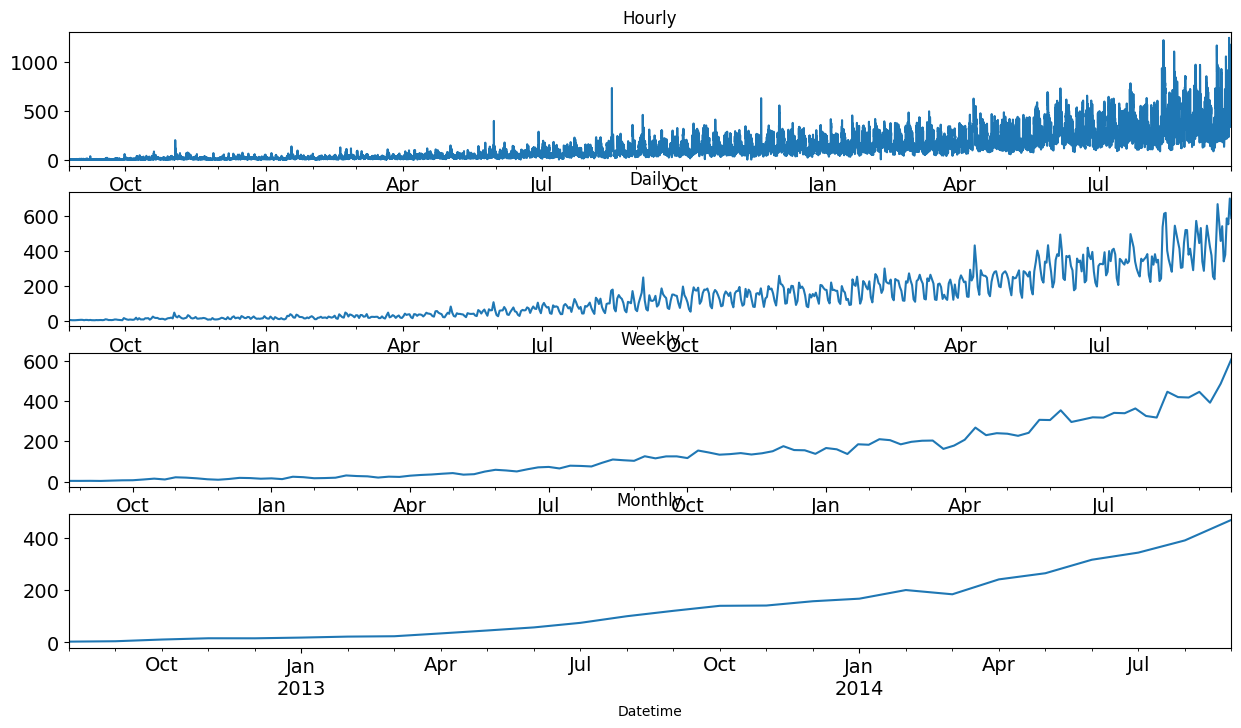

In [21]:
fig, axs= plt.subplots(4,1)
hourly.Count.plot(figsize=(15,8), title= 'Hourly', fontsize=14, ax=axs[0])
daily.Count.plot(figsize=(15,8), title= 'Daily', fontsize=14, ax=axs[1])
weekly.Count.plot(figsize=(15,8), title= 'Weekly', fontsize=14, ax=axs[2])
monthly.Count.plot(figsize=(15,8), title= 'Monthly', fontsize=14, ax=axs[3])
plt.show()

In [22]:
test.Timestamp=pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M')
test.index = test.Timestamp

test = test.resample('D').mean()

train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M')
train.index = train.Timestamp

train = train.resample('D').mean()